In [3]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [4]:

with open('/media/adminnio/Volume/jasjappan/blender/orginalposes/transforms_test.json', 'r') as file:
    transform_data = json.load(file)
poses = np.array([frame['transform_matrix'] for frame in transform_data['frames']])

origins = poses[:,:-1,-1]
directions = poses[:,:-1,0:3]
directions_x = directions[:,0]
directions_y = directions[:,1]
directions_z = directions[:,2]
origins_x = origins[:,0]
origins_y = origins[:,1]
origins_z = origins[:,2]

In [5]:
print(directions_x[1])
dx_list = []
dy_list = []
dz_list = []

for direction in directions:
    direction = direction*[0,0,-1]
    dx = direction[0].flatten()
    dy = direction[1].flatten()
    dz = direction[2].flatten()
    dx_list.append(dx)
    dy_list.append(dy)
    dz_list.append(dz)
print(dx_list[1])
dx1 = np.array(dx_list)
dy1 = np.array(dy_list)
dz1 = np.array(dz_list)

[ 0.99633628 -0.08549893 -0.00194188]
[ 0.         -0.          0.00194188]


In [6]:
dy1[1]

array([0.        , 0.        , 0.98609567])

In [7]:
np.sum(dx1[1])

0.0019418784650042653

NameError: name 'm' is not defined

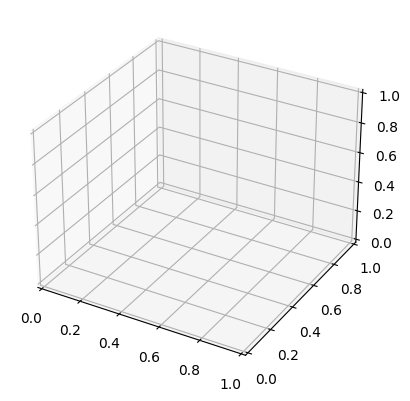

In [8]:
  
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
xs = origins_x
ys = origins_y
zs = origins_z
ax.scatter(xs, ys, zs, marker=m)

for i in range(xs.shape[0]):
    ax.quiver(origins_x[i], origins_y[i] ,origins_z[i],np.sum(dx1[i]),np.sum(dy1[i]),np.sum(dz1[i]),length=0.3,color='yellow')
 
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.savefig("path") 
plt.show()

In [9]:
o_np = np.array(origin_new_list)
print(o_np[1,1])

NameError: name 'origin_new_list' is not defined

In [10]:

    for camera_extrinsics in extrinsic_matrices:
        # Extract translation and rotation from camera extrinsics matrix
        translation = camera_extrinsics[:3, 3]
        rotation_matrix = camera_extrinsics[:3, :3]

        # Plot camera position
        ax.scatter(*translation, marker='o')

        # Plot camera orientation axes
        origin = translation
        for i in range(3):
            axis_direction = rotation_matrix[:,i] 
            if i == 0:
                ax.quiver(*origin, *axis_direction, length=0.5, normalize=True)
            else:
                ax.quiver(*origin, *axis_direction, length=1, normalize=True)
        # Plot camera direction
        z = -1 * rotation_matrix[:,2]
        ax.quiver(*origin, *z, length=1, normalize=True, color='r', alpha=0.5)

NameError: name 'extrinsic_matrices' is not defined

[ 0.99633628 -0.08549893 -0.00194188]
[ 0.         -0.          0.00194188]


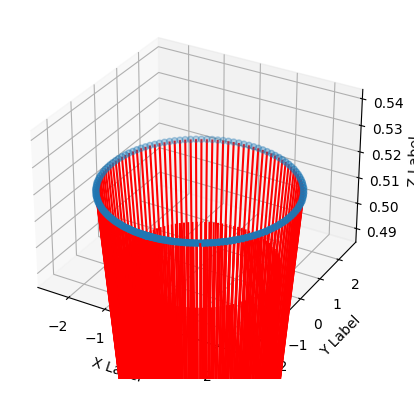

In [13]:
import numpy as np
import json
import matplotlib.pyplot as plt

# with open('/media/adminnio/Volume/jasjappan/blender/datacolmap/ouput/transforms.json', 'r') as file:
# with open('/media/adminnio/Volume/jasjappan/blender/orginalposes/transforms_val.json', 'r') as file:
    #  transform_data = json.load(file)


with open('/media/adminnio/Volume/jasjappan/blender/orginalposes/transforms_test.json', 'r') as file:
    transform_data = json.load(file)
poses = np.array([frame['transform_matrix'] for frame in transform_data['frames']])

origins = poses[:,:-1,-1]
directions = poses[:,:-1,0:3]
origins_x = origins[:,0]
origins_y = origins[:,1]
origins_z = origins[:,2]
directions_x = directions[:,0]
directions_y = directions[:,1]
directions_z = directions[:,2]
 
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# n = 100

# # For each set of style and range settings, plot n random points in the box
# # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# xs = origins_x
# ys = origins_y
# zs = origins_z
# ax.scatter(xs, ys, zs, marker=m)
# # ax.quiver(, origins_y[1] origins_z[1], directions_x[1].flatten(),directions_x[1].flatten(),directions_x[1].flatten(),,color=')
# # ax.quiver(origins_x[1], origins_y[1], origins_z[1], u, v, w, length=0.1, normalize=True)

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# plt.savefig("path") 
# plt.show()
 
print(directions_x[1])
dx_list = []
dy_list = []
dz_list = []

for direction in directions:
    direction = direction*[0,0,-1]
    dx = direction[0].flatten()
    dy = direction[1].flatten()
    dz = direction[2].flatten()
    dx_list.append(dx)
    dy_list.append(dy)
    dz_list.append(dz)
print(dx_list[1])
dx1 = np.array(dx_list)
dy1 = np.array(dy_list)
dz1 = np.array(dz_list)
  
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
xs = origins_x
ys = origins_y
zs = origins_z
ax.scatter(xs, ys, zs)

for i in range(xs.shape[0]):
    ax.quiver(origins_x[i], origins_y[i] ,origins_z[i],np.sum(dx1[i]),np.sum(dy1[i]),np.sum(dz1[i]),length=0.7,color='red')
 
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.savefig("path") 
plt.show()

In [15]:
def getrays(H:int,W:int,focall:float,origin):
    u,v = np.meshgrid(np.arrange(W),np.arrange(H))
    u.reshape(-1).astype(np.float32)
    v.reshape(-1).astype(np.float32)
    d = np.stack((u - W/2,-(v-H/2),-np.ones_like(u)*focall)
    

SyntaxError: unexpected EOF while parsing (1031781280.py, line 6)